In [168]:
# Loading Libraries 

import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [169]:
# Laod the dataset name Auto1
Auto1 = pd.read_csv("C:/Users/HP/Downloads/Auto1-DS-TestData.csv")

In [170]:
# observations of dimensions of the dataset rows & columns
Auto1.shape

(205, 26)

In [171]:
# observations of columns 
Auto1.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [172]:
# observations of Daata frames
Auto1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [173]:
# identifying the Duplicates if any
Auto1.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196    False
197    False
198    False
199    False
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [174]:
# imputation and replacing the missing values
from sklearn.preprocessing import Imputer
Auto1 = Auto1.replace('?', 'NaN')
imp = Imputer(missing_values='NaN', strategy='mean' )
Auto1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = imp.fit_transform(Auto1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']])
Auto1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


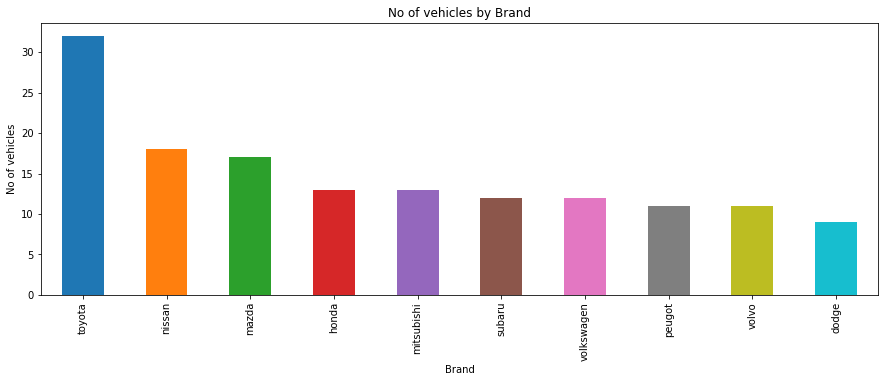

In [175]:
Auto1.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("No of vehicles by Brand")
plt.ylabel('No of vehicles')
plt.xlabel('Brand');

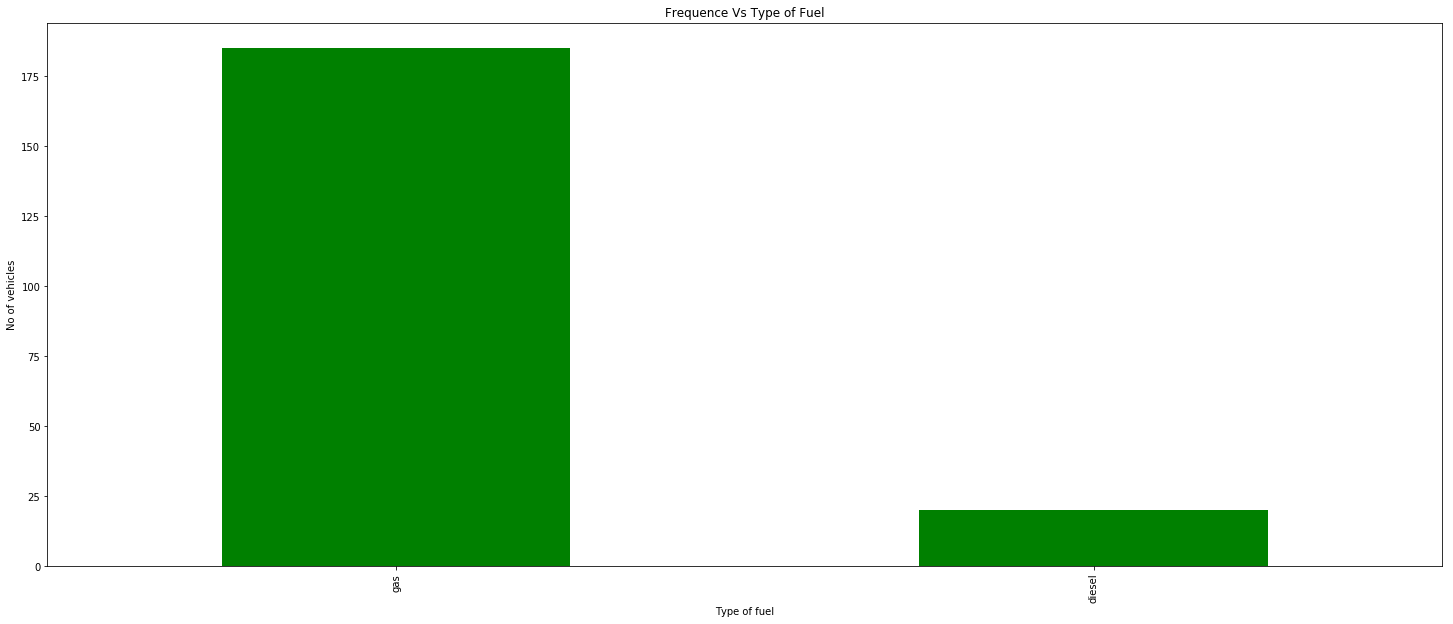

In [176]:
Auto1['fuel-type'].value_counts().plot(kind='bar',color='green')
plt.title("Frequence Vs Type of Fuel")
plt.ylabel('No of vehicles')
plt.xlabel('Type of fuel');

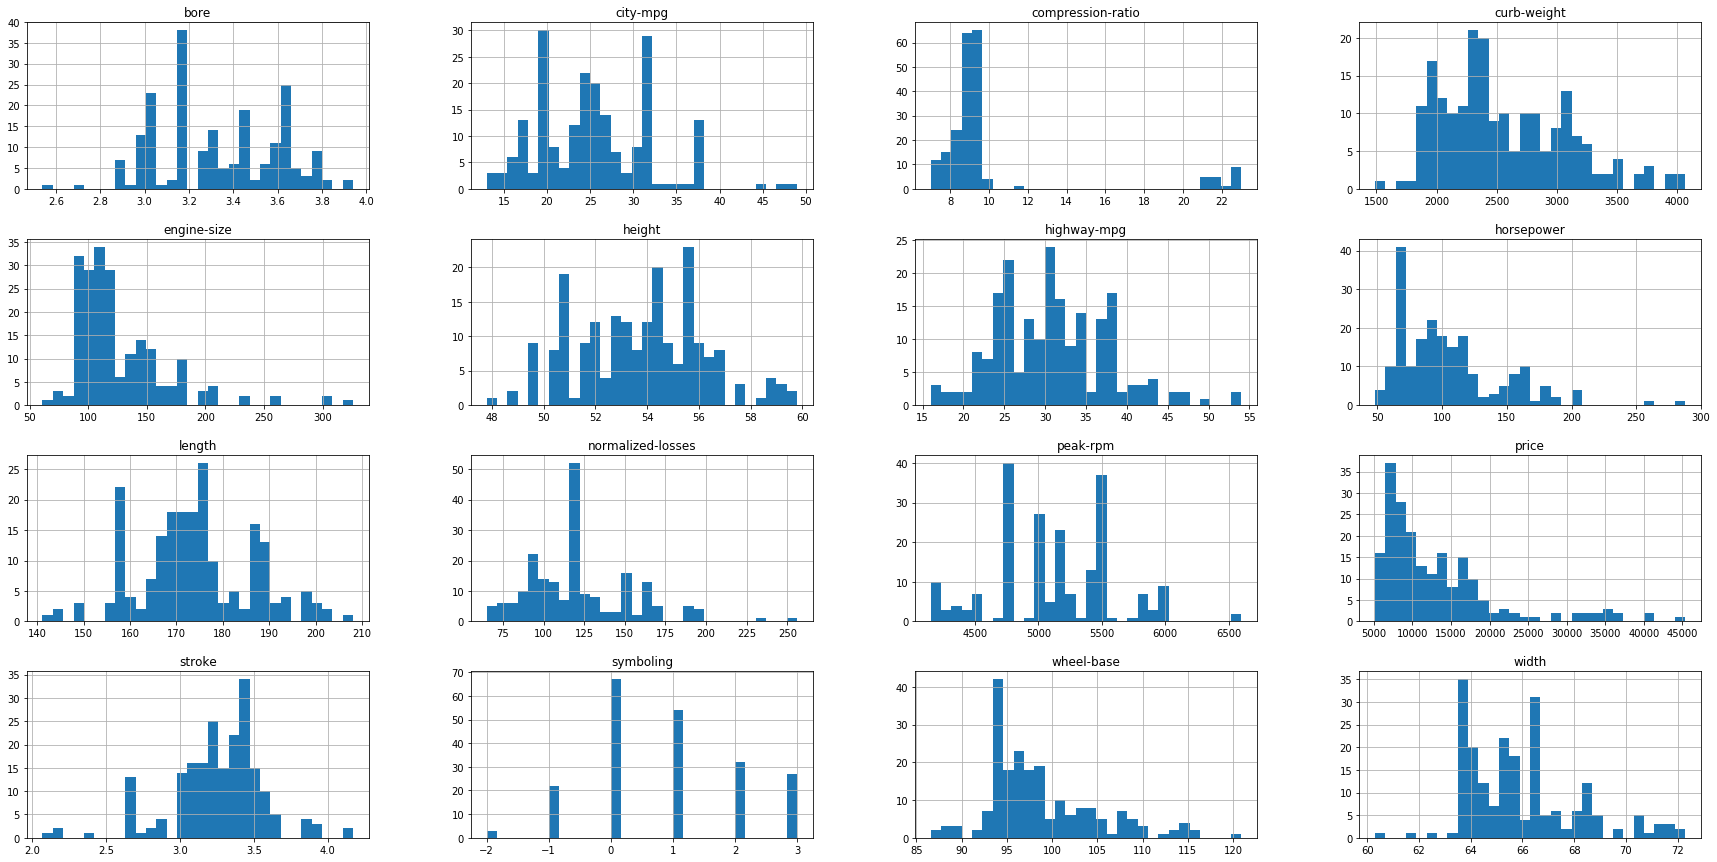

In [177]:
# Histogram Figures 

%matplotlib inline
Auto1.hist(bins=30, figsize=(30,15))
plt.savefig("Histogram Figures")
plt.show()

In [178]:
# observation of string data missing
Auto1.groupby('num-of-doors').size()


num-of-doors
NaN       2
four    114
two      89
dtype: int64

In [179]:
# replacing the missing values for variable num-of-doors
Auto1 = Auto1.replace("NaN","four")
Auto1.head(35) #for 29 row/observation num-of-doors data is missing so considered till 35 observations

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,13207.129353


In [180]:
# check of imputation and repacing for string variable 
Auto1.groupby('num-of-doors').size()

num-of-doors
four    116
two      89
dtype: int64

In [181]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
for i in ['make','fuel-type','aspiration', 'num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']:
    Auto1[i] = labelencoder.fit_transform(Auto1[i])
Auto1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [147]:
# Descriptive Statistics (Basic understanding of significant variables 
Auto1.describe().round(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,...,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,0.834,122.000,12.195,0.902,0.180,0.434,2.615,1.327,0.015,98.757,...,126.907,3.254,3.330,3.255,10.143,104.256,5125.369,25.220,30.751,13207.129
std,1.245,31.681,6.275,0.297,0.386,0.497,0.859,0.556,0.120,6.022,...,41.643,2.013,0.271,0.314,3.972,39.519,476.979,6.542,6.886,7868.768
min,-2.000,65.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,86.600,...,61.000,0.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,0.000,101.000,8.000,1.000,0.000,0.000,2.000,1.000,0.000,94.500,...,97.000,1.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,1.000,122.000,12.000,1.000,0.000,0.000,3.000,1.000,0.000,97.000,...,120.000,5.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10595.000
75%,2.000,137.000,19.000,1.000,0.000,1.000,3.000,2.000,0.000,102.400,...,141.000,5.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16500.000
max,3.000,256.000,21.000,1.000,1.000,1.000,4.000,2.000,1.000,120.900,...,326.000,7.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [182]:
# correlation coefficient

corr = Auto1.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
            ]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '9pt'})\
    .set_caption("CORRELATION RELATIONSHIP BETWEEN VARIABLES")\
    .set_precision(4)\
    .set_table_styles(magnify())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1,0.4652,-0.1188,0.1943,-0.05987,0.6636,-0.5961,-0.04167,0.2125,-0.532,-0.3576,-0.2329,-0.541,-0.2277,0.05037,0.1978,-0.1058,0.09116,-0.1301,-0.008689,-0.1785,0.07139,0.2737,-0.03582,0.03461,-0.0822
normalized-losses,0.4652,1,-0.251,0.1014,-0.006823,0.3572,-0.2509,0.311,4.281e-19,-0.05652,0.01921,0.08419,-0.3707,0.09779,-0.0842,0.1668,0.111,0.228,-0.02927,0.05493,-0.1145,0.2034,0.2377,-0.2187,-0.1782,0.134
make,-0.1188,-0.251,1,-0.1132,0.05427,-0.1515,0.08949,-0.004317,0.05461,0.0785,0.1196,0.003783,0.2362,0.02402,-0.05154,-0.03994,-0.07092,0.1466,0.2512,-0.201,0.1388,-0.05365,-0.2183,0.05364,0.05002,-0.1615
fuel-type,0.1943,0.1014,-0.1132,1,-0.4014,0.1885,-0.1479,-0.1323,0.04007,-0.3083,-0.2127,-0.2339,-0.2846,-0.2173,0.0827,0.1106,-0.06959,0.04153,-0.05446,-0.2418,-0.9844,0.1652,0.4771,-0.256,-0.1914,-0.1102
aspiration,-0.05987,-0.006823,0.05427,-0.4014,1,-0.0528,0.06303,0.06646,-0.05719,0.2576,0.2345,0.3006,0.08731,0.3249,-0.103,-0.1331,0.1082,0.2881,0.2126,0.223,0.2955,0.2402,-0.1836,-0.2024,-0.2544,0.1773
num-of-doors,0.6636,0.3572,-0.1515,0.1885,-0.0528,1,-0.6856,0.1049,0.1391,-0.4396,-0.3857,-0.1977,-0.5403,-0.1907,0.06265,0.156,-0.01392,0.00698,-0.1085,0.006892,-0.1718,0.1282,0.2403,0.01427,0.03745,-0.04195
body-style,-0.5961,-0.2509,0.08949,-0.1479,0.06303,-0.6856,1,-0.1557,-0.277,0.4014,0.3344,0.1317,0.5685,0.1285,-0.03702,-0.04841,-0.07335,-0.06508,0.01056,-0.01534,0.1362,-0.1524,-0.1094,0.0317,-0.00717,-0.07268
drive-wheels,-0.04167,0.311,-0.004317,-0.1323,0.06646,0.1049,-0.1557,1,0.1479,0.4597,0.4856,0.4708,-0.01972,0.5751,-0.1168,0.2232,0.5243,0.4247,0.4818,0.07162,0.1275,0.5169,-0.03972,-0.4496,-0.4522,0.5769
engine-location,0.2125,4.281e-19,0.05461,0.04007,-0.05719,0.1391,-0.277,0.1479,1,-0.1878,-0.05099,-0.0517,-0.1062,0.05047,0.1141,0.1355,0.1968,0.106,0.185,-0.1385,-0.01976,0.3176,0.1984,-0.1535,-0.102,0.331
wheel-base,-0.532,-0.05652,0.0785,-0.3083,0.2576,-0.4396,0.4014,0.4597,-0.1878,1,0.8746,0.7951,0.5894,0.7764,-0.1356,-0.1846,0.5693,0.3846,0.4888,0.1609,0.2498,0.352,-0.3607,-0.4704,-0.5441,0.5832


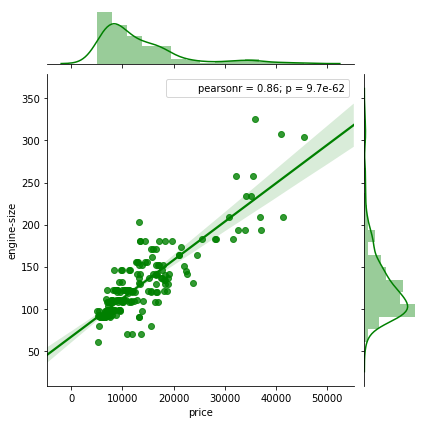

In [183]:
# Bloxplots
sns.jointplot(data=Auto1, x='price', y='engine-size', kind='reg', color='g')
plt.show()

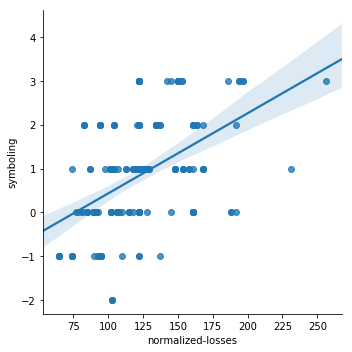

In [184]:
g = sns.lmplot('normalized-losses',"symboling", Auto1);

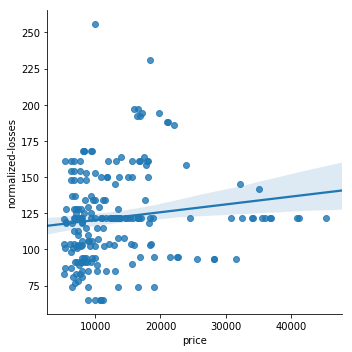

In [185]:
g = sns.lmplot('price',"normalized-losses", Auto1);

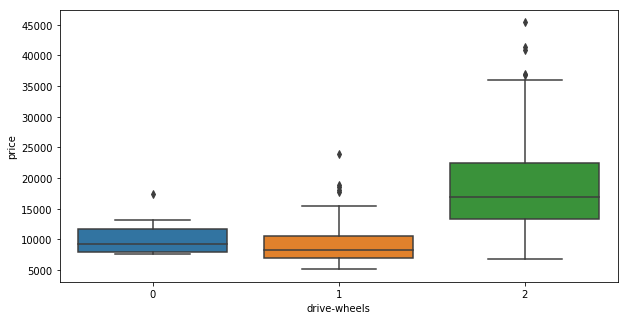

In [186]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=Auto1)

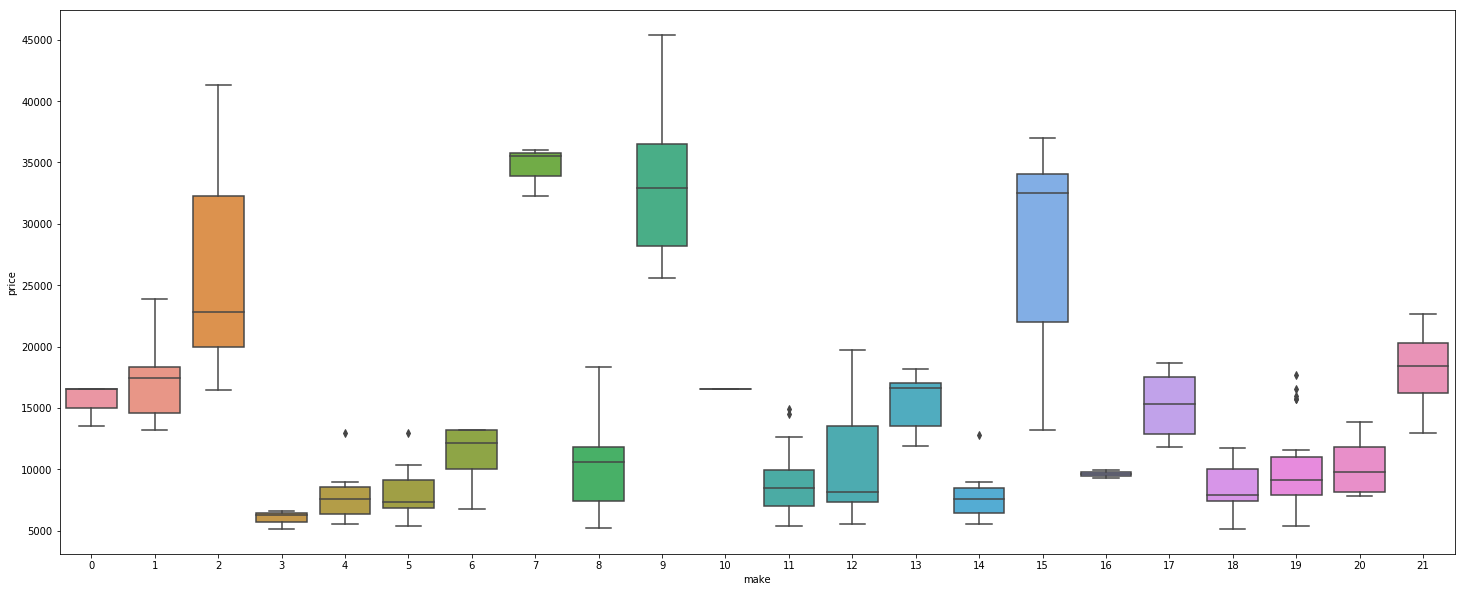

In [187]:
plt.rcParams['figure.figsize']=(25,10)
ax = sns.boxplot(x="make", y="price", data=Auto1)

In [188]:
from sklearn.preprocessing import Imputer
Auto1 = Auto1.replace('?', 'NaN')
imp = Imputer(missing_values='NaN', strategy='mean' )
Auto1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = imp.fit_transform(Auto1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']])
Auto1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [189]:
# Spliting the data into train and test dataset in 80% and 20% respectively

import sklearn
from sklearn import model_selection
Y = Auto1['price']
X = Auto1.drop('price',axis =1)

x_train, x_test, y_train,  y_test = sklearn.model_selection.train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=0)

In [190]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm_1 = regressor.fit(x_train, y_train)

In [191]:
lm_1.score(x_train,y_train)

0.9123334982164664

In [192]:
lm_1.score(x_test,y_test)

0.6884334242207176

In [193]:
Auto1 = Auto1.copy()
names = []
for name in Auto1.columns:
    names.append(name.replace('-', '_'))

Auto1.columns = names

In [194]:
import statsmodels.formula.api as smf

lm0 = smf.ols(formula= 'price ~ symboling + normalized_losses + wheel_base +  width + height + length + + curb_weight + engine_size + stroke + compression_ratio + peak_rpm + city_mpg + highway_mpg + bore + horsepower' , data =Auto1).fit()

# 
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     55.03
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           1.38e-60
Time:                        18:26:38   Log-Likelihood:                -1957.1
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     189   BIC:                             3999.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.105e+04   1.75e+0

In [195]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [196]:
# Split-out validation dataset
array = Auto1.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
seed = 7
scoring = 'accuracy'

In [197]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.835294 (0.061822)
LDA: 0.853676 (0.063184)
KNN: 0.822426 (0.071480)
CART: 0.841176 (0.063205)
NB: 0.853676 (0.063184)
SVM: 0.805147 (0.075614)


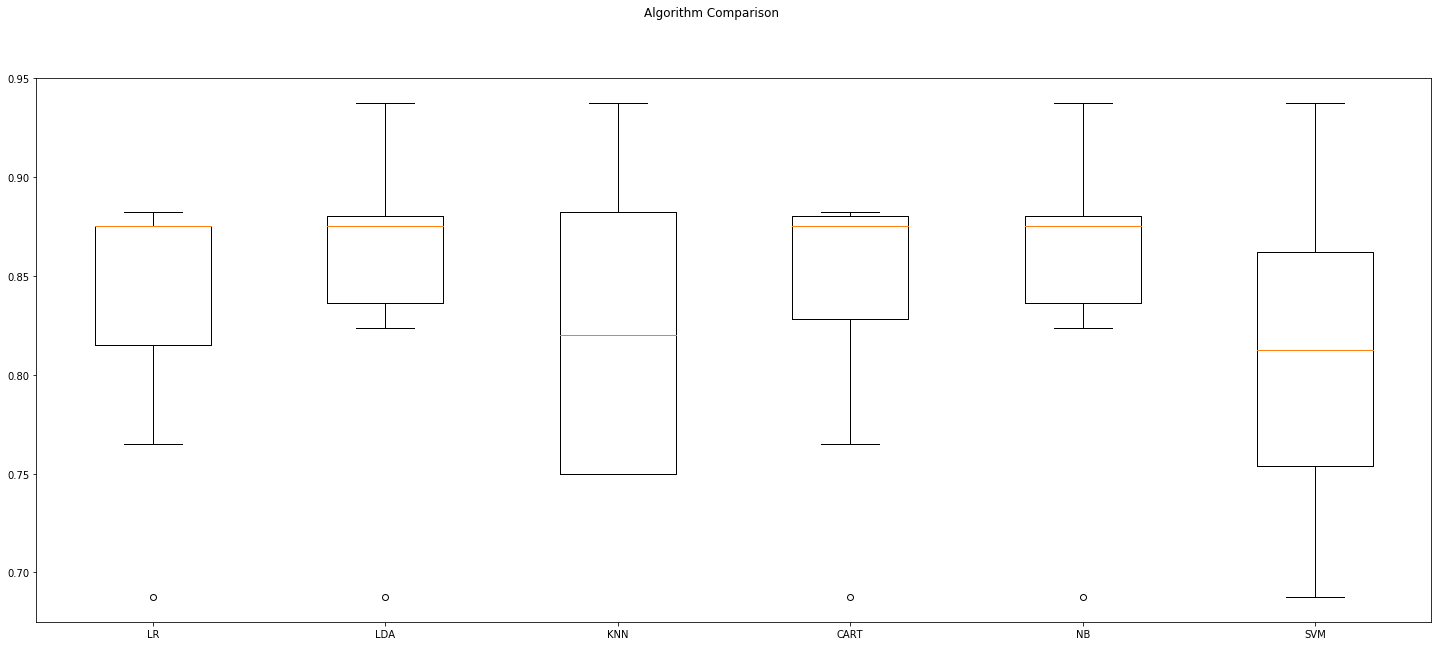

In [198]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [199]:
# Make predictions on validation dataset 
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8292682926829268
[[32  3]
 [ 4  2]]
             precision    recall  f1-score   support

        0.0       0.89      0.91      0.90        35
        1.0       0.40      0.33      0.36         6

avg / total       0.82      0.83      0.82        41



In [200]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8292682926829268
[[32  3]
 [ 4  2]]
             precision    recall  f1-score   support

        0.0       0.89      0.91      0.90        35
        1.0       0.40      0.33      0.36         6

avg / total       0.82      0.83      0.82        41



In [201]:
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8536585365853658
[[33  2]
 [ 4  2]]
             precision    recall  f1-score   support

        0.0       0.89      0.94      0.92        35
        1.0       0.50      0.33      0.40         6

avg / total       0.83      0.85      0.84        41



In [202]:
# Thank you